In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(data.shape)
data.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


#### rename columns

In [3]:
#lower case
cols = []
for column in data.columns:
    cols.append(column.lower())    
data.columns = cols
data.head(1)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


In [4]:
#underscores
n_cols = []
for i in range(len(data.columns)):
    n_cols.append(data.columns[i].lower().replace(' ', '_'))
data.columns = n_cols
pd.set_option('display.max_columns', None)
data.head(1)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


#### date column to datetime format

In [5]:
data['effective_to_date']=pd.to_datetime(data['effective_to_date'])
data.head(2)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [6]:
data.dtypes #efective to date is now datetime64

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

#### differentiate between continious and discrete variables

In [7]:
numerical=data.select_dtypes(include=['float64','int64']) # get the numerical data
numerical.head(1)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147


In [8]:
#in this case we can say float is continious and int64 discrete
continious_data=data.select_dtypes(include=['float64'])
display(continious_data.head(1))
discrete_data=data.select_dtypes(include=['int64'])
display(discrete_data.head(1))

,customer_lifetime_value,total_claim_amount
0,2763.519279,384.811147


,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,56274,69,32,5,0,1


In [9]:
# we see that income is assigned as a discrete value because its int, clearly its a continious, so i change it to float
data['income'] = data['income'].astype('float64')
discrete_data=discrete_data.drop(['income'],axis=1)# drop income from discerete
continious_data=data.select_dtypes(include=['float64'])
display(continious_data.head(1))

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274.0,384.811147


### correlation matrix of numerical data

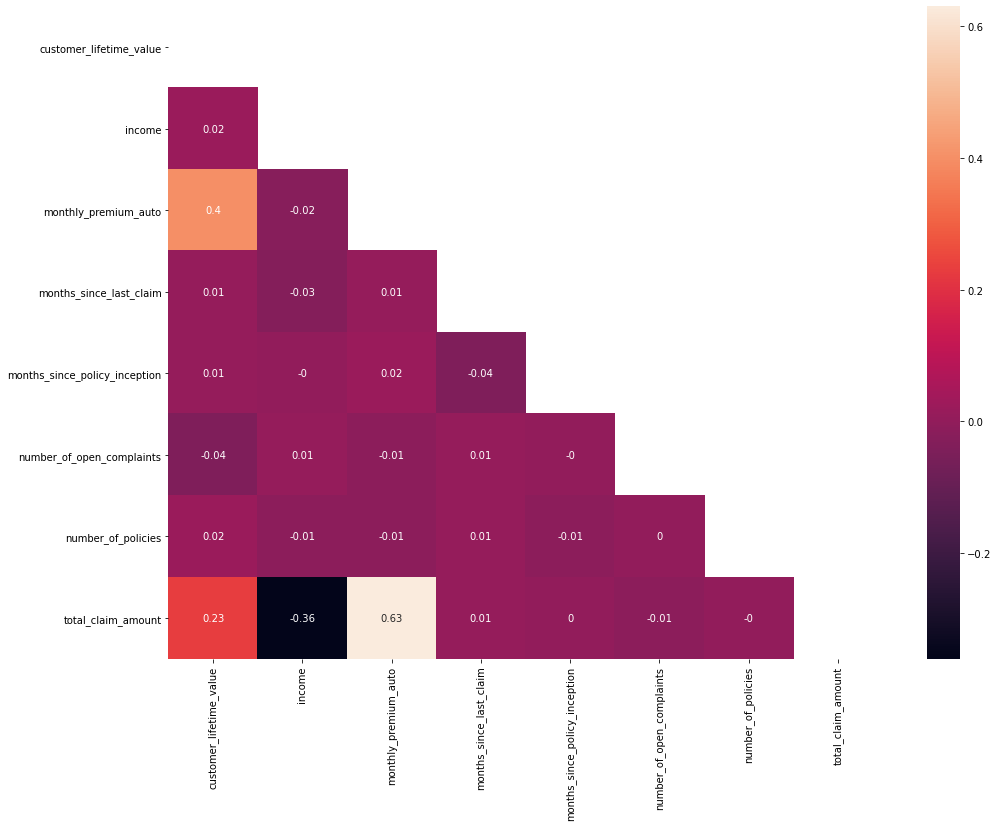

In [10]:
corr = np.corrcoef(numerical.corr().round(2))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style():
    f, ax = plt.subplots(figsize=(16, 12))
    sns.heatmap(numerical.corr().round(2), mask=mask, annot = True)

 we can say that our target value (total claimamount) is highly corrleated to montly_preimum_auto,
    monthly premium auto is also correlated to customer lifetime value,
    while the other vlaues are postively correlated the income is negatively correlated with total claim amount

#### plot every discrete variable

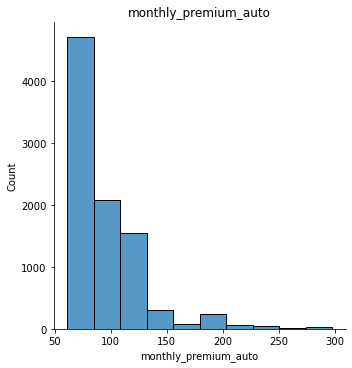

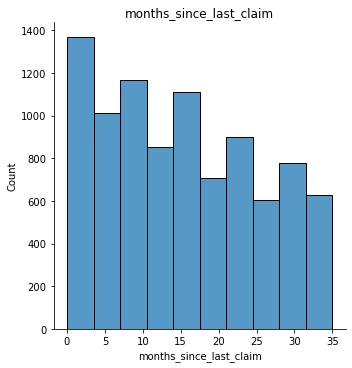

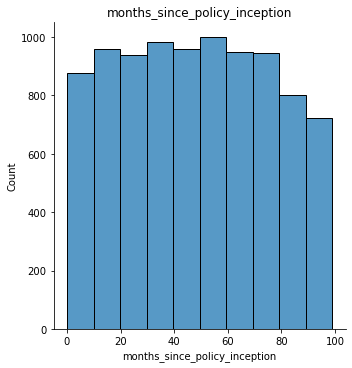

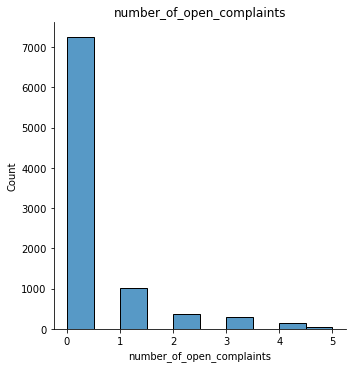

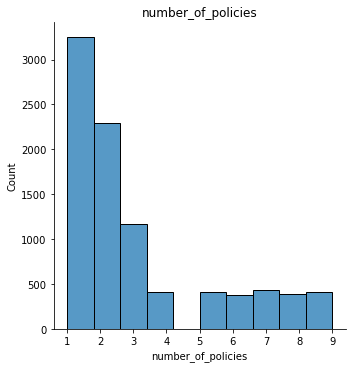

In [11]:
#use histogram for discrete data


for i in discrete_data.columns:
    sns.displot(x=i, data= discrete_data, bins=10)
    plt.title(i)
    plt.show()



some variables are more equally distrbruted than others, like mohtly preimium auto has a lot of low values but not somuch larger ones

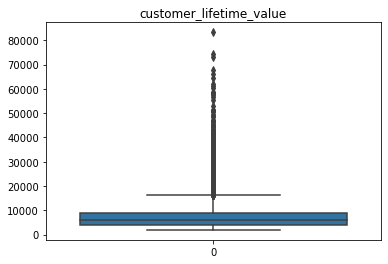

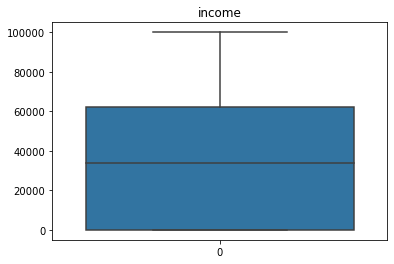

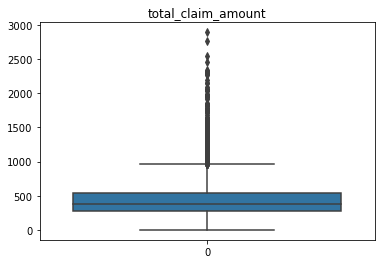

In [12]:
#use boxplotchart for others
for i in continious_data.columns:
    plt.figure()
    sns.boxplot(data=continious_data[i])
    plt.title(i)
    plt.show()

customer life time value & total claim amount have a lot of outliers we need to probaly take care of later, income is spread a lot

the outliers could be romves setting a resonable threshold

### check all columns for NaNs

In [13]:
data.isnull().sum()/len(data) #No Nans included

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

# lab2: categorical data cleaning

In [14]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

<ipython-input-14-40bc8cf6ac51>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data.select_dtypes(np.object)


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


#### already checked  Nans, no included

In [15]:
categoricals.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

#### check unqiue values if we can summarize or rearrange something

In [16]:
data.state.value_counts(dropna=False)

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [17]:
data.response.value_counts(dropna=False) #one could transfer that to a boolean

No     7826
Yes    1308
Name: response, dtype: int64

In [18]:
data['response']=data.response.map(dict(Yes=1, No=0))

In [19]:
data['response'].dtype


dtype('int64')

In [20]:
data.coverage.value_counts(dropna=False)

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [21]:
data.education.value_counts(dropna=False)

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [22]:
data.employmentstatus.value_counts(dropna=False)

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [23]:
data.gender.value_counts(dropna=False)

F    4658
M    4476
Name: gender, dtype: int64

In [24]:
data.location_code.value_counts(dropna=False)

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [25]:
data.marital_status.value_counts(dropna=False)

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [26]:
data.policy_type.value_counts(dropna=False)

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [27]:
data.policy.value_counts(dropna=False)

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

### policy type is also included in policy, therefore i keep policy type columbn and erase it from the policy column, policy becomes numerical

In [28]:
data['policy'] = data['policy'].str.replace(r'\D+', '', regex=True).astype('int')

In [29]:
categoricals.policy.value_counts(dropna=False)

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [30]:
data.renew_offer_type.value_counts(dropna=False) #instead of string and number this could be also numerical

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [31]:
def offer(x):
    if x=='Offer1':
        return 1
    if x=='Offer2':
        return 2
    if x=='Offer3':
        return 3
    else:
        return 4

data['renew_offer_type'] = data['renew_offer_type'].apply(offer)

In [32]:
data.renew_offer_type.value_counts(dropna=False)

1    3752
2    2926
3    1432
4    1024
Name: renew_offer_type, dtype: int64

In [33]:
data.renew_offer_type.dtypes

dtype('int64')

In [34]:
data.sales_channel.value_counts(dropna=False)

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [35]:
data.vehicle_class.value_counts(dropna=False)

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [36]:
# one could think a SUV is normally also a four-door car, and a sports car potentially a two door car: but thats a lots of guessing and i wouldnt group it since its just 6 categories

In [37]:
data.vehicle_size.value_counts(dropna=False)

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [ ]:
#we dont have any categoricals that have a lot of unique values

In [38]:
categoricals = data.select_dtypes(np.object)
categoricals=categoricals.drop(['customer'], axis=1)
categoricals.head()

<ipython-input-38-a1f8562fca05>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data.select_dtypes(np.object)


,state,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,sales_channel,vehicle_class,vehicle_size
0,Washington,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Agent,Two-Door Car,Medsize
1,Arizona,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Agent,Four-Door Car,Medsize
2,Nevada,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Agent,Two-Door Car,Medsize
3,California,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Call Center,SUV,Medsize
4,Washington,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Agent,Four-Door Car,Medsize
